# Redes Neuronales Artificiales
## Por: Luis Alberto Chavarría Zamora

### Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

Este dataset es aportado por la división de recursos marinos de los laboratorios de recursos marinos de Taroona en Department of Primary Industry and Fisheries, Tasmania. Los datos son del año 1995. 

Estos datos son utilizados para predecir la edad del abalone, un tipo de molusco que en español se conocen como orejas de mar o abulones, es un ser vivo con carne altamente estimada y ampliamente consumida en la Asia Oriental, Estados Unidos y México. La edad del abalone es predicha a partir mediciones físicas donde se corta el cono y se cuentan el número de anillos en un microscopio, esta tarea se indica que consume mucho tiempo y es bastante aburrida al parecer. Por estas razones es necesario métodos más sencillos de obtener como el clima de la zona, el lugar. La base de datos ya fue procesada para eliminar datos faltantes.

Este problema es de clasificación donde se debe clasificar datos como: sexo, largo, diametro, altura, peso absoluto, peso de su carne, peso de la viscera después de haber sangrado, peso de la concha después de haber sido secada. Luego, con estos datos se debe obtener el número de anillos. Se tienen 4177 datos con rango de 1~29, excepto 28, los cuales tienen una distribución bastante similar a una gausiana o normal, donde en los límites se observan valores inferiores al centro.

Estos datos ya han sido procesados por otras fuentes, sin embargo han tenido resultados poco alentadores como por ejemplo:

- Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD thesis, Computer Science Department, University of Tasmania. Usaron 3133 datos entrenamiento y 1044 de prueba. Se usaron métodos de inteligencia artificial como redes neuronales y otros como knn de las siguiente manera:

 - Cascade-Correlation (no hidden nodes) con 24.86% de acierto.
 - Cascade-Correlation (5 hidden nodes) con 26.25% de acierto.
 - C4.5 con 21.5% de acierto.
 - knn con k=5 con un 3.57%.
 
- David Clark, Zoltan Schreter, Anthony Adams "A Quantitative Comparison of Dystal and Backpropagation", submitted to the Australian Conference on Neural Networks (ACNN'96). En este el conjunto de datos fue agrupado en tres categorías de clasificación: 1~8 anillos; 9 y 10; y finalmente de 11 en adelante. Se usaron los siguientes algoritmos:

 - Backprop con 64% de acierto.
 - Dystal con 55% de acierto.
 - Cascade-Correlation (no hidden nodes) con 61.40% de acierto.
 - Cascade-Correlation (5 hidden nodes) con 65.61% de acierto.
 - C4.5 con 59.2% de acierto.
 - knn con k=5, acertando un 62.46%
 
### A través del análisis de las curvas se verá a continuación que el mejor valor para evitar overfitting o underfitting es con una distribución de datos de entrenamiento de 75% y 25% para prueba o dicho de otra forma 3133 de entrenamiento y 1044 de prueba.
 
En este documento se intentaron mejorar las predicciones con metodos de aprendizaje supervisado, sin agrupar los anillos, sino individualmente, tratando de predecir el número de anillos. Se espera mejorar los resultados mostrados anteriormente.

# Preprocesamiento de datos

En esta etapa se cargan los datos y se acondicionan. Los datos tienen valores continuos, excepto el sexo que lo clasifican entre M, F y I, que significan masculino, femenino e infante, respectivamente

In [1]:
#Se cargan las bibliotecas necesarias para el trabajo
from sklearn import preprocessing
import matplotlib
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Se apagan los warnings para evitar las alertas de posibles cambios de versión en Python3
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

#Dirección del set de datos.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
# Se carga el dataset como un csv, a continuación se muestran los datos de cada columna
df = pd.read_csv(url, names=['sex','length','diameter','height','whole height','shucked weight',
                             'viscera weight','shell weight','rings'])
#Se imprimen las primeras 10 filas de información importada.

# Se indican el significado de cada columna o feature
features = ['sex','length','diameter','height','whole height','shucked weight','viscera weight','shell weight']

# Se separan los datos cargados en atributos (x) y clases (y)
x = df.loc[:,features].values
y = df.loc[:,['rings']].values
# Se usa ravel para colocar los datos en una sola columna
y = y.ravel()

Como los datos de sexo son letras, es necesario utilizar un label encoder para que lo coloque ordinalmente, para que por ejemplo sea: M -> 1, F -> 2 e I -> 3.

In [2]:
le = preprocessing.LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

Como se indicó previamente, los datos a simple vista tienen una distribución normal o gausiana, por esta razón se utilizan un escalamiento estándar.

In [3]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
# Aparece un warning pues la información se convirtió al tipo float64

Se va a realizar un preprocesado a través de PCA para disminuir las dimensiones a analizar (conseguir menos de 8).

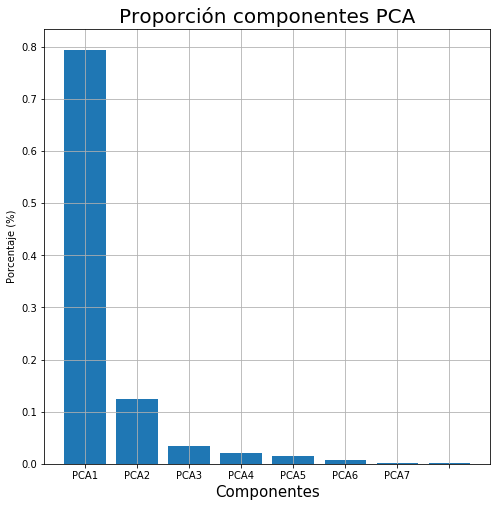

In [4]:
# Se extraen todas las componentes de los datos, que son 8
n_atributes = x.shape[1]

# Se extrae el PCA y se introducen en los datos
pca = PCA(n_components = n_atributes)
principalComponents = pca.fit_transform(x)

# Nombra cada una de las componentes del PCA
pca_features = ['PCA' + str(i) for i in range(n_atributes)]
principalDf = pd.DataFrame(data = principalComponents, columns = pca_features)

# Grafica los datos
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#Grafica las componentes de PCA según su porcentaje
ax.bar(range(n_atributes),pca.explained_variance_ratio_)
ax.set_xlabel('Componentes', fontsize = 15)
ax.set_xticklabels(pca_features)
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Proporción componentes PCA',fontsize = 20)
ax.grid()

Se puede ver que las componentes más importantes del PCA son las dos primeras, pues entre ambas pueden representar cerca del 90% de los datos, como se ve a continuación con la suma acumulativa:

In [5]:
print(pca.explained_variance_ratio_.cumsum())

[0.7945299  0.91958372 0.9544069  0.97530572 0.98953509 0.99757707
 0.99916792 1.        ]


Se procede a graficar los datos

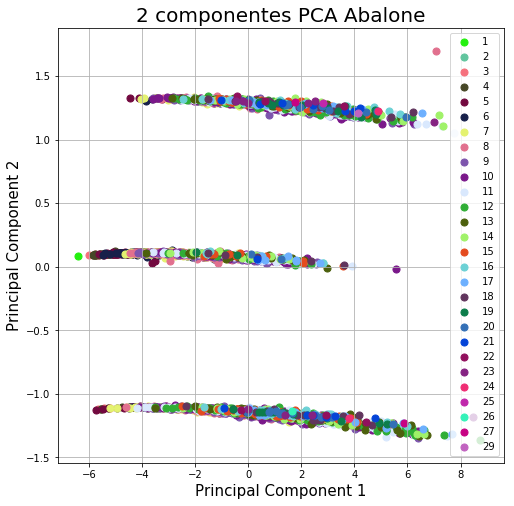

In [6]:
from sklearn.utils import column_or_1d
# Se escoge graficar solo dos componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents)

le = preprocessing.LabelEncoder()
le.fit(df[['rings']])
targets = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf = pd.concat([principalDf, df[['rings']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes PCA Abalone', fontsize = 20)

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets:
    # Busca los indices que sean iguales al target
    indices = finalDf['rings'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax.scatter(finalDf.loc[indices, 0]
               , finalDf.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax.legend(targets)
ax.grid()

Se puede ver que hay tres grupos bien definidos, más sin embargo, dentro de sí mismos tienen mezclados varios puntos, a continuación se va a comparar el rendimiento que tiene este preprocesamiento contra las 8 componentes procesadas a través de algunos métodos de aprendizaje automático.

Se analiza cuantos anillos hay en cada uno de los tres grupos visibles de PCA.

Se nota en la primera tabla que los grupos se pueden organizar como se mostró en las investigaciones anteriores, tomando 1~8 en un grupo, de 9~11 y 15 en otro y finalmente, de 12 en adelante otro.

Por esta razón, se propone crear una etiqueta extra para realizar el aprendizaje supervisado, indicando si pertenece al grupo 1, 2 o 3.

Se realizan cuatro propuestas de análisis.

In [7]:
# Función para plotear la curva de aprendizaje
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 20)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Primer propuesta: Separar los clusters por DBSCAN

Se procede a aplicar un método de aprendizaje no supervisado, se nota que el algoritmo que realiza mejor los clusters es el DBSCAN.

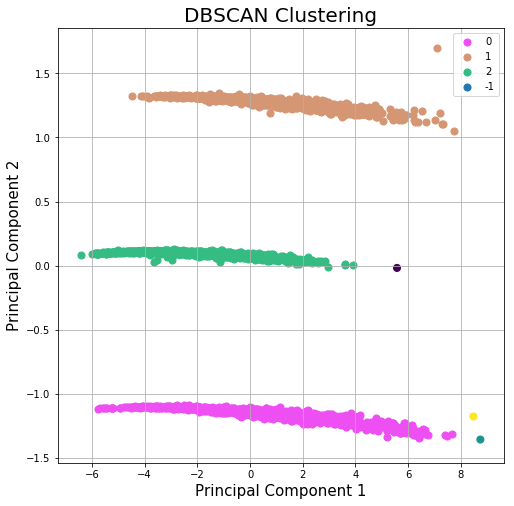

In [8]:
x_pca = principalDf
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.0, min_samples=10).fit(x_pca)
DBSCANunsupervisedDf = pd.DataFrame(data = db.labels_)
targets = pd.unique(db.labels_)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('DBSCAN Clustering', fontsize = 20)

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets:
    # Busca los indices que sean iguales al target
    indices = DBSCANunsupervisedDf[0] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax.scatter(x_pca.loc[indices, 0]
               , x_pca.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax.legend(targets)
ax.grid()

Se puede ver que existen grupos bien conformados gracias al DBSCAN, sin embargo se produce un cuarto grupo no deseado, el cual no se tomará en cuenta pues se observa que los primeros tres están bien conformados.

## Aprendizaje de clusters por medio de red neuronal

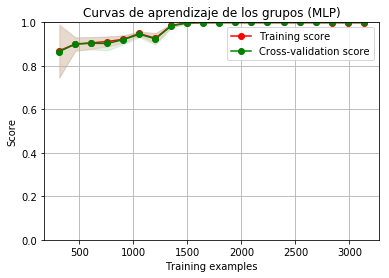

In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1e-2, hidden_layer_sizes=(4,2), random_state=1)

title = "Curvas de aprendizaje de los grupos (MLP)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = mlp
plot_learning_curve(estimator, title, x_pca, DBSCANunsupervisedDf, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

Se puede ver que los datos convergen muy rapidamente hasta el 100% después de usar cerca de 1400 datos de entrenamiento. Este 100% de los datos es logrado gracias a que los grupos están claramente definidos entre sí.

Luego se procede a separar la base de datos en datos de entrenamiento y de prueba.

In [10]:
from sklearn.cross_validation import train_test_split

# Se van a tener 2 set de entrenamiento y prueba, donde los primeros son sin preprocesamiento PCA 
# y los otros con preprocesamiento PCA. Se usa el random_state para asegurar que se usen los mismos
# datos al ser generados por la misma llave.

# Se dividen los datos, donde un 25% son de prueba y el resto de entrenamiento para manejar la misma
# proporción de datasets con respecto a las investigaciones.

# Se determina el porcentaje de datos de prueba

datos_prueba = 0.25;

x_pca = principalDf
y_pca = DBSCANunsupervisedDf

# Datos con preprocesamiento PCA.
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(x_pca, y_pca,test_size=datos_prueba,
                                                                    random_state=50)

/home/luis/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Se analiza de nuevo la precisión a la hora de predecir el grupo al que pertenece

In [11]:
from sklearn.metrics import accuracy_score
mlp.fit(X_train_PCA, y_train_PCA)
pred = mlp.predict(X_test_PCA)
#Se evalua la precisión
print('Puntaje de precisión \n \n \t Predicción de pertenecer a alguno de los tres clusters:',
      accuracy_score(y_test_PCA, pred))

Puntaje de precisión 
 
 	 Predicción de pertenecer a alguno de los tres clusters: 1.0


Se demuestra que es posible llegar a un sistema capaz de clasificar los abalone en tres subgrupos para realizar un análisis exhaustivo sobre cada uno para poder llegar a una mejor predicción de los anillos en estos moluscos.

Ahora se procede a separar los tres grupos para realizar los análisis de componentes principales (PCA) y la predicción por medio de MLP.

In [12]:
# Se separan los datos en las etiquetas generadas por el método de DBSCAN, solo que aquí no se acuñan las
# componentes del PCA sino los datos originales

datos_crudos = pd.DataFrame(data = x)

datos_pca = pd.concat([datos_crudos, y_pca, df[['rings']]], axis = 1)

#['sex','length','diameter','height','whole height','shucked weight',
#                             'viscera weight','shell weight','rings']

datos_pca.columns = ['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                     'shell weight','grupo', 'rings']

# Se toman los tres grupos principales
grupo0 = datos_pca['grupo'] == 0
grupo1 = datos_pca['grupo'] == 1
grupo2 = datos_pca['grupo'] == 2

grupo0 = datos_pca[grupo0][['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                            'shell weight','rings']]
grupo1 = datos_pca[grupo1][['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                            'shell weight','rings']]
grupo2 = datos_pca[grupo2][['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                            'shell weight','rings']]

# Se reacomodan los indices pues debido a la extracción los indices no van en orden creciente unitario
grupo0 = grupo0.reset_index()
grupo0 = grupo0.drop(columns = 'index')
grupo1 = grupo1.reset_index()
grupo1 = grupo1.drop(columns = 'index')
grupo2 = grupo2.reset_index()
grupo2 = grupo2.drop(columns = 'index')

# Se guardan los datos de los anillos por grupos
anillosgrupo0 = grupo0[['rings']]
anillosgrupo1 = grupo1[['rings']]
anillosgrupo2 = grupo2[['rings']]

# Se elimina la columna con la información de los anillos para poder realizar el escalado
grupo0 = grupo0.drop(columns = 'rings')
grupo1 = grupo1.drop(columns = 'rings')
grupo2 = grupo2.drop(columns = 'rings')

In [13]:
# Se toman los datos crudos y se realiza un standard scaler
from sklearn.preprocessing import StandardScaler
grupo0df = pd.DataFrame(data = StandardScaler().fit_transform(grupo0))
grupo1df = pd.DataFrame(data = StandardScaler().fit_transform(grupo1))
grupo2df = pd.DataFrame(data = StandardScaler().fit_transform(grupo2))

# Se nombra cada columna
grupo0df.columns = ['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                  'shell weight']
grupo1df.columns = ['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                  'shell weight']
grupo2df.columns = ['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                  'shell weight']

### Graficar los grupos

Se procede a realizar el análisis de componentes principales para encontrar los datos más importantes en cada grupo.

Suma acumulada de las componentes PCA de cada grupo:
Grupo 0:  [0.90300978 0.93867906 0.96520307 0.98371978 0.99633132 0.9987661
 1.         1.        ]
Grupo 1:  [0.83899136 0.9273406  0.95660459 0.97929835 0.99441335 0.99836864
 1.         1.        ]
Grupo 2:  [0.92946914 0.96000772 0.97668729 0.98854995 0.99687017 0.99883705
 1.         1.        ]


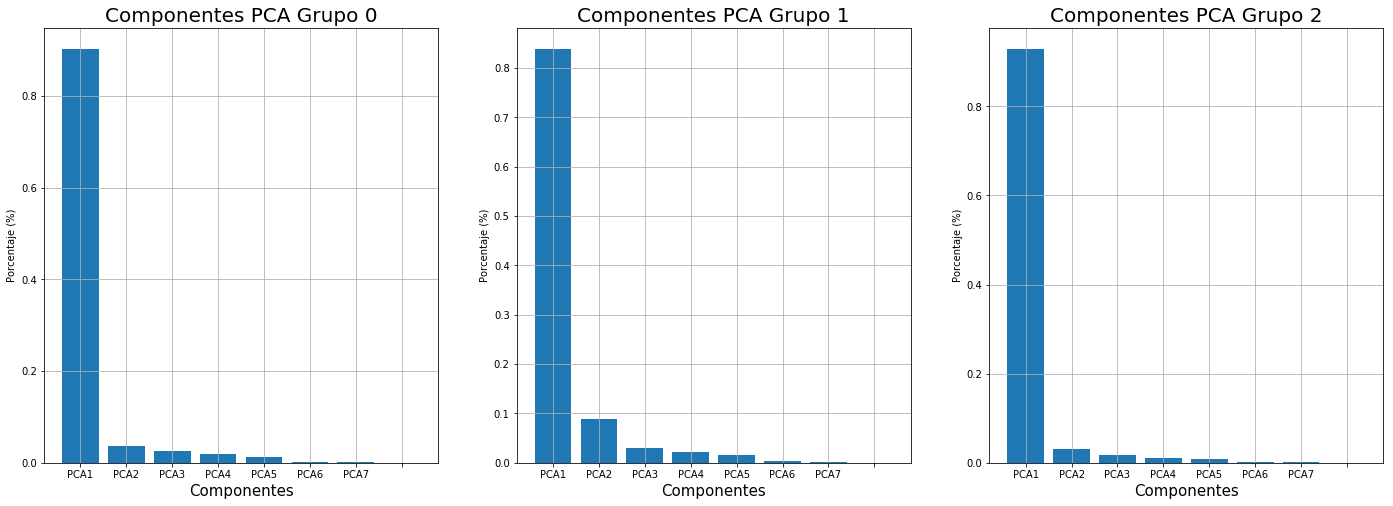

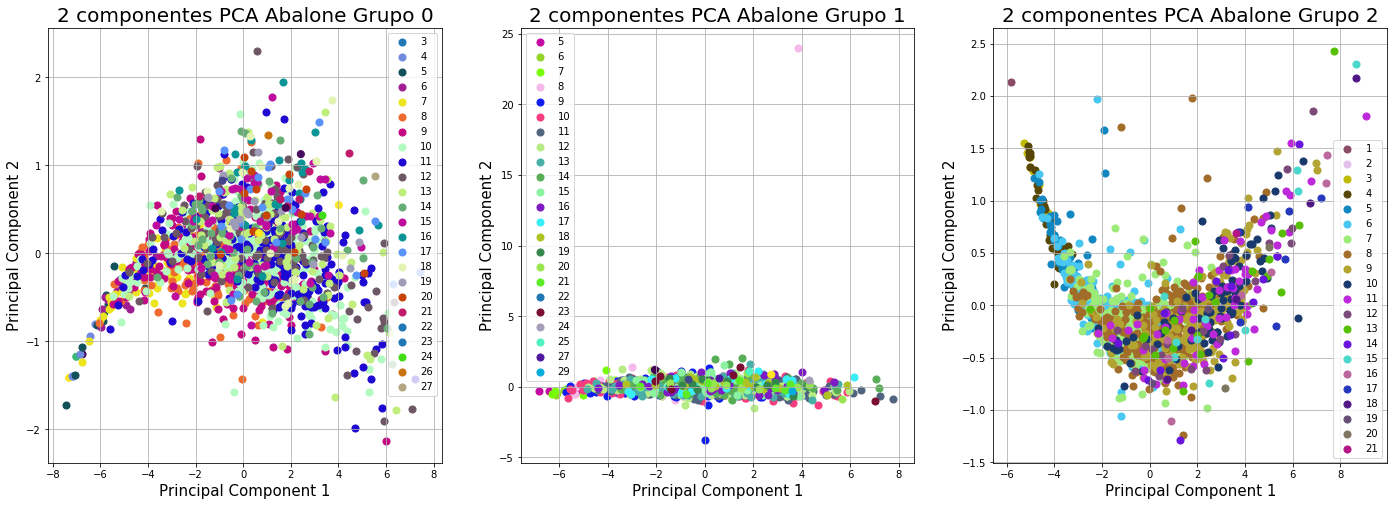

In [14]:
from sklearn.utils import column_or_1d

# Grafica los datos

fig1 = plt.figure(figsize = (8*3,8))
ax0 = fig1.add_subplot(1,3,1) 
ax1 = fig1.add_subplot(1,3,2) 
ax2 = fig1.add_subplot(1,3,3)

fig1 = plt.figure(figsize = (8*3,8))
ax0c = fig1.add_subplot(1,3,1) 
ax1c = fig1.add_subplot(1,3,2) 
ax2c = fig1.add_subplot(1,3,3)

# Grupo 0

# Se extraen todas las componentes de los datos, que son 8
n_atributes_0 = grupo0df.shape[1]

# Se extrae el PCA y se introducen en los datos
pca_0 = PCA(n_components = n_atributes_0)
principalComponents_0 = pca_0.fit_transform(grupo0df)

# Nombra cada una de las componentes del PCA
pca_features_0 = ['PCA' + str(i) for i in range(n_atributes_0)]
#principalDf0 = pd.DataFrame(data = principalComponents_0, columns = pca_features_0)

ax0.bar(range(n_atributes_0),pca_0.explained_variance_ratio_)
ax0.set_xlabel('Componentes', fontsize = 15)
ax0.set_xticklabels(pca_features_0)
ax0.set_ylabel('Porcentaje (%)')
ax0.set_title('Componentes PCA Grupo 0',fontsize = 20)
ax0.grid()

print('Suma acumulada de las componentes PCA de cada grupo:')

print('Grupo 0: ',pca_0.explained_variance_ratio_.cumsum())

# Se escoge graficar solo dos componentes
pca_0 = PCA(n_components=2)
principalComponents_2_0 = pca_0.fit_transform(grupo0df)

principalDf0 = pd.DataFrame(data = principalComponents_2_0)

le = preprocessing.LabelEncoder()
le.fit(anillosgrupo0)
targets_0 = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf0 = pd.concat([principalDf0, anillosgrupo0], axis = 1)

ax0c.set_xlabel('Principal Component 1', fontsize = 15)
ax0c.set_ylabel('Principal Component 2', fontsize = 15)
ax0c.set_title('2 componentes PCA Abalone Grupo 0', fontsize = 20)

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets_0:
    # Busca los indices que sean iguales al target
    indices = finalDf0['rings'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax0c.scatter(finalDf0.loc[indices, 0]
               , finalDf0.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax0c.legend(targets_0)
ax0c.grid()

# Grupo 1

# Se extraen todas las componentes de los datos, que son 8
n_atributes_1 = grupo1df.shape[1]

# Se extrae el PCA y se introducen en los datos
pca_1 = PCA(n_components = n_atributes_1)
principalComponents_1 = pca_1.fit_transform(grupo1df)

# Nombra cada una de las componentes del PCA
pca_features_1 = ['PCA' + str(i) for i in range(n_atributes_1)]

# Grafica los datos
ax1.bar(range(n_atributes_1),pca_1.explained_variance_ratio_)
ax1.set_xlabel('Componentes', fontsize = 15)
ax1.set_xticklabels(pca_features_1)
ax1.set_ylabel('Porcentaje (%)')
ax1.set_title('Componentes PCA Grupo 1',fontsize = 20)
ax1.grid()

print('Grupo 1: ',pca_1.explained_variance_ratio_.cumsum())

# Se escoge graficar solo dos componentes
pca_1 = PCA(n_components=2)
principalComponents_2_1 = pca_1.fit_transform(grupo1df)

principalDf1 = pd.DataFrame(data = principalComponents_2_1)

le = preprocessing.LabelEncoder()
le.fit(anillosgrupo1)
targets_1 = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf1 = pd.concat([principalDf1, anillosgrupo1], axis = 1)

ax1c.set_xlabel('Principal Component 1', fontsize = 15)
ax1c.set_ylabel('Principal Component 2', fontsize = 15)
ax1c.set_title('2 componentes PCA Abalone Grupo 1', fontsize = 20)

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets_1:
    # Busca los indices que sean iguales al target
    indices = finalDf1['rings'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax1c.scatter(finalDf1.loc[indices, 0]
               , finalDf1.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax1c.legend(targets_1)
ax1c.grid()

# Grupo 2

# Se extraen todas las componentes de los datos, que son 8
n_atributes_2 = grupo2df.shape[1]

# Se extrae el PCA y se introducen en los datos
pca_2 = PCA(n_components = n_atributes_2)
principalComponents_2 = pca_2.fit_transform(grupo2df)

# Nombra cada una de las componentes del PCA
pca_features_2 = ['PCA' + str(i) for i in range(n_atributes_2)]

# Grafica los datos
ax2.bar(range(n_atributes_2),pca_2.explained_variance_ratio_)
ax2.set_xlabel('Componentes', fontsize = 15)
ax2.set_xticklabels(pca_features_2)
ax2.set_ylabel('Porcentaje (%)')
ax2.set_title('Componentes PCA Grupo 2',fontsize = 20)
ax2.grid()

print('Grupo 2: ',pca_2.explained_variance_ratio_.cumsum())

# Se escoge graficar solo dos componentes
pca_2 = PCA(n_components=2)
principalComponents_2_2 = pca_1.fit_transform(grupo2df)

principalDf2 = pd.DataFrame(data = principalComponents_2_2)

le = preprocessing.LabelEncoder()
le.fit(anillosgrupo2)
targets_2 = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf2 = pd.concat([principalDf2, anillosgrupo2], axis = 1)

ax2c.set_xlabel('Principal Component 1', fontsize = 15)
ax2c.set_ylabel('Principal Component 2', fontsize = 15)
ax2c.set_title('2 componentes PCA Abalone Grupo 2', fontsize = 20)

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets_2:
    # Busca los indices que sean iguales al target
    indices = finalDf2['rings'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax2c.scatter(finalDf2.loc[indices, 0]
               , finalDf2.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax2c.legend(targets_2)
ax2c.grid()

Se observa que los grupos ya no tienen separaciones obvias como la anterior. Se nota que en el grupo 1 hay un outlier importante. En los grupos 0 y 2 se notan formas de garfio.

Viendo la distribución de los anillos no se nota alguna pertenencia única, es decir que los datos de 9 anillos no pertenecen únicamente a uno de los tres grupos. Sin embargo, se nota una pertenencia de los datos que tienen pocos datos como 1, 2, 24, 25, 26, 27, 29. Los datos se muestran a continuación:

	Class	Examples
	-----	--------
	1	    1
	2	    1
	3	    15
	4	    57
	5	    115
	6	    259
	7	    391
	8	    568
	9	    689
	10	   634
	11	   487
	12       267
	13	   203
	14	   126
	15	   103
	16	   67
	17	   58
	18	   42
	19	   32
	20	   26
	21	   14
	22	   6
	23	   9
	24	   2
	25	   1
	26	   1
	27	   2
	29	   1
	-----	----
	Total	4177

### Obtención curvas de aprendizaje 

Se proceden a obtener las curvas de aprendizaje de los tres grupos.

In [15]:
x_pca_0 = principalDf0
x_pca_1 = principalDf1
x_pca_2 = principalDf2

x_0 = grupo0
x_1 = grupo1
x_2 = grupo2

y_pca_0 = anillosgrupo0
y_pca_1 = anillosgrupo1
y_pca_2 = anillosgrupo2

datos_prueba = 0.25;

# Datos con preprocesamiento PCA.
X_train_PCA_0, X_test_PCA_0, y_train_PCA_0, y_test_PCA_0 = train_test_split(x_pca_0, y_pca_0,
                                                                            test_size=datos_prueba,random_state=50)
X_train_PCA_1, X_test_PCA_1, y_train_PCA_1, y_test_PCA_1 = train_test_split(x_pca_1, y_pca_1,
                                                                            test_size=datos_prueba,random_state=50)
X_train_PCA_2, X_test_PCA_2, y_train_PCA_2, y_test_PCA_2 = train_test_split(x_pca_2, y_pca_2,
                                                                            test_size=datos_prueba,random_state=50)

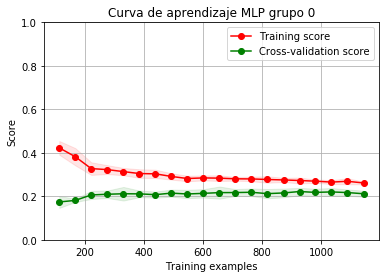

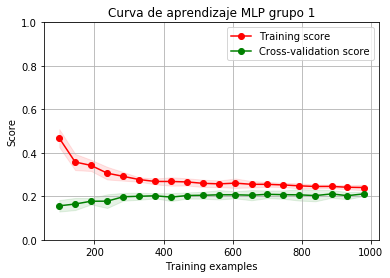

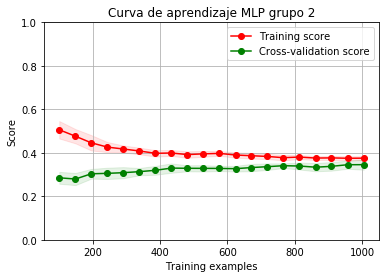

In [16]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(8,), random_state=1, learning_rate = 'adaptive')

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = mlp

title = "Curva de aprendizaje MLP grupo 0"
plot_learning_curve(estimator, title, x_pca_0, y_pca_0, ylim=(0.0, 1.0), cv=cv, n_jobs=4)
plt.show()

title = "Curva de aprendizaje MLP grupo 1"
plot_learning_curve(estimator, title, x_pca_1, y_pca_1, ylim=(0.0, 1.0), cv=cv, n_jobs=4)
plt.show()

title = "Curva de aprendizaje MLP grupo 2"
plot_learning_curve(estimator, title, x_pca_2, y_pca_2, ylim=(0.0, 1.0), cv=cv, n_jobs=4)
plt.show()

Se procede a calcular el puntaje de precisión con un 25% de los datos.

In [17]:
mlp.fit(X_train_PCA_0, y_train_PCA_0)
pred_0 = mlp.predict(X_test_PCA_0)

mlp.fit(X_train_PCA_1, y_train_PCA_1)
pred_1 = mlp.predict(X_test_PCA_1)

mlp.fit(X_train_PCA_2, y_train_PCA_2)
pred_2 = mlp.predict(X_test_PCA_2)

#Se evalua la precisión
print('Puntaje de precisión \n \n \t Grupo 0:', accuracy_score(y_test_PCA_0, pred_0) * 100,
      '\n \t Grupo 1:', accuracy_score(y_test_PCA_1, pred_1) * 100,
      '\n \t Grupo 2:', accuracy_score(y_test_PCA_2, pred_2) * 100,
      '\n \n \t Promedio ponderado de los tres grupos: ', (accuracy_score(y_test_PCA_0, pred_0) + 
                                                          accuracy_score(y_test_PCA_0, pred_0) +
                                                          accuracy_score(y_test_PCA_0, pred_0)) * 100 / 3)

Puntaje de precisión 
 
 	 Grupo 0: 21.98952879581152 
 	 Grupo 1: 19.571865443425075 
 	 Grupo 2: 31.845238095238095 
 
 	 Promedio ponderado de los tres grupos:  21.98952879581152


# Segunda propuesta: Realizar el mismo proceso de la primera propuesta tomando en cuenta los pesos

Se aplican los pesos a cada uno de los datos según la correlación mostrada en y la figura:

https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

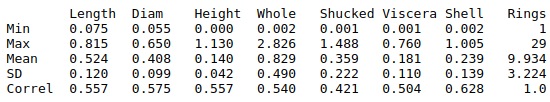

In [18]:
from IPython.display import Image
Image(filename='/home/luis/Pictures/correlacion.png')

Estos pesos son aplicados a cada una de las columnas

In [19]:
# Se aplican los pesos a cada columna
df['length'] *= 0.557
df['diameter'] *= 0.575
df['height'] *= 0.557
df['whole height'] *= 0.540
df['shucked weight'] *= 0.421
df['viscera weight'] *= 0.504
df['shell weight'] *= 0.628

# Se separan los datos cargados en atributos (x) y clases (y)
x = df.loc[:,features].values
y = df.loc[:,['rings']].values
# Se usa ravel para colocar los datos en una sola columna
y = y.ravel()

[0.7945299  0.91958372 0.9544069  0.97530572 0.98953509 0.99757707
 0.99916792 1.        ]


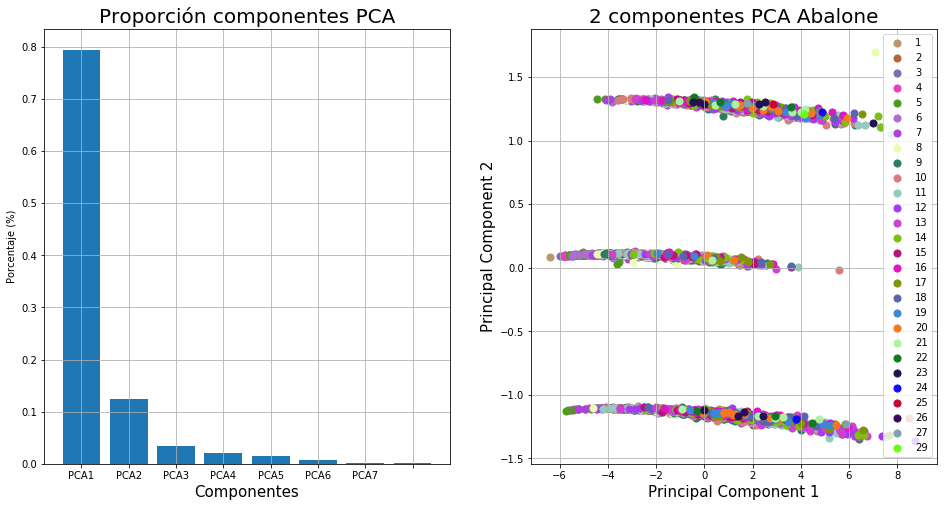

In [20]:
le = preprocessing.LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

# Se extraen todas las componentes de los datos, que son 8
n_atributes = x.shape[1]

# Se extrae el PCA y se introducen en los datos
pca = PCA(n_components = n_atributes)
principalComponents = pca.fit_transform(x)

# Nombra cada una de las componentes del PCA
pca_features = ['PCA' + str(i) for i in range(n_atributes)]
principalDf = pd.DataFrame(data = principalComponents, columns = pca_features)

# Grafica los datos
fig = plt.figure(figsize = (2*8,8))
ax = fig.add_subplot(1,2,1) 
#Grafica las componentes de PCA según su porcentaje
ax.bar(range(n_atributes),pca.explained_variance_ratio_)
ax.set_xlabel('Componentes', fontsize = 15)
ax.set_xticklabels(pca_features)
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Proporción componentes PCA',fontsize = 20)
ax.grid()

print(pca.explained_variance_ratio_.cumsum())

from sklearn.utils import column_or_1d
# Se escoge graficar solo dos componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents)

le = preprocessing.LabelEncoder()
le.fit(df[['rings']])
targets = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf = pd.concat([principalDf, df[['rings']]], axis = 1)

ax = fig.add_subplot(1,2,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes PCA Abalone', fontsize = 20)

# Para agrupar en colores los resultados se recorren todos los targets (29)
for target in targets:
    # Busca los indices que sean iguales al target
    indices = finalDf['rings'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax.scatter(finalDf.loc[indices, 0]
               , finalDf.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax.legend(targets)
ax.grid()

Se ve a simple vista que las curvas son bastante similares con las anteriores, para encontrar si son iguales, se procede a obtener solo los puntajes, pues la tarea de calcular las curvas de aprendizaje toma mucho tiempo.

Se obtiene el clustering de los datos y su respectiva predicción usando MLP.

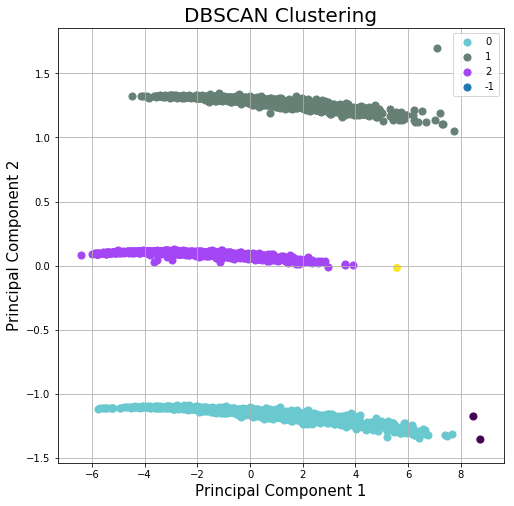

In [21]:
x_pca = principalDf
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.0, min_samples=10).fit(x_pca)
DBSCANunsupervisedDf = pd.DataFrame(data = db.labels_)
targets = pd.unique(db.labels_)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('DBSCAN Clustering', fontsize = 20)

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets:
    # Busca los indices que sean iguales al target
    indices = DBSCANunsupervisedDf[0] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax.scatter(x_pca.loc[indices, 0]
               , x_pca.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax.legend(targets)
ax.grid()

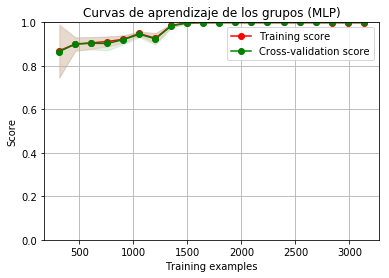

In [22]:
mlp = MLPClassifier(alpha=1e-2, hidden_layer_sizes=(4,2), random_state=1)

title = "Curvas de aprendizaje de los grupos (MLP)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = mlp
plot_learning_curve(estimator, title, x_pca, DBSCANunsupervisedDf, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [23]:
datos_prueba = 0.25;

x_pca = principalDf
y_pca = DBSCANunsupervisedDf

# Datos con preprocesamiento PCA.
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(x_pca, y_pca,test_size=datos_prueba,
                                                                    random_state=50)

from sklearn.metrics import accuracy_score
mlp.fit(X_train_PCA, y_train_PCA)
pred = mlp.predict(X_test_PCA)
#Se evalua la precisión
print('Puntaje de precisión \n \n \t Predicción de pertenecer a alguno de los tres clusters:',
      accuracy_score(y_test_PCA, pred))

Puntaje de precisión 
 
 	 Predicción de pertenecer a alguno de los tres clusters: 1.0


Se calculan los puntajes partiendo los datos a un 25% de prueba y 75% de entrenamiento.

In [24]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(8,), random_state=1, learning_rate = 'adaptive')

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = mlp

mlp.fit(X_train_PCA_0, y_train_PCA_0)
pred_0 = mlp.predict(X_test_PCA_0)

mlp.fit(X_train_PCA_1, y_train_PCA_1)
pred_1 = mlp.predict(X_test_PCA_1)

mlp.fit(X_train_PCA_2, y_train_PCA_2)
pred_2 = mlp.predict(X_test_PCA_2)

#Se evalua la precisión
print('Puntaje de precisión \n \n \t Grupo 0:', accuracy_score(y_test_PCA_0, pred_0) * 100,
      '\n \t Grupo 1:', accuracy_score(y_test_PCA_1, pred_1) * 100,
      '\n \t Grupo 2:', accuracy_score(y_test_PCA_2, pred_2) * 100,
      '\n \n \t Promedio ponderado de los tres grupos: ', (accuracy_score(y_test_PCA_0, pred_0) + 
                                                          accuracy_score(y_test_PCA_1, pred_1) +
                                                          accuracy_score(y_test_PCA_2, pred_2)) * 100 / 3)

Puntaje de precisión 
 
 	 Grupo 0: 21.98952879581152 
 	 Grupo 1: 19.571865443425075 
 	 Grupo 2: 31.845238095238095 
 
 	 Promedio ponderado de los tres grupos:  24.468877444824898


Si se comparan los porcentajes se ve que no hay cambio, pues se mantienen.

# Tercera Propuesta: Hacer un análisis de los datos y determinar tres grupos para la mayoría de los datos

Se toman de nuevo los datos.

In [25]:
from sklearn.utils import column_or_1d
# Se escoge graficar solo dos componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents)

le = preprocessing.LabelEncoder()
le.fit(df[['rings']])
targets = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf = pd.concat([principalDf, df[['rings']]], axis = 1)

grupo1, grupo2, grupo3 = ([] for i in range(3))

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets:
    # Busca los indices que sean iguales al target
    indices = finalDf['rings'] == target

Se separan los grupos para encontrar la pertenencia de los datos en los grupos, esto para ver la proporción en cada grupo. El análisis de pertenencia se hace creando a mano cada uno de los grupos notando las fronteras creadas por el DBSCAN.

In [26]:
grupo1, grupo2, grupo3 = ([] for i in range(3))
grupos = []
for i in range(len(indices)):
    #grupos.append(y[i])
    if finalDf.loc[i, 1] > 0.5:
        grupo1.append(y[i])
        grupos.append(1)
    elif finalDf.loc[i, 1] < -0.5:
        grupo3.append(y[i]) 
        grupos.append(3)
    else:
        grupo2.append(y[i])
        grupos.append(2)

from collections import Counter

# Se habilita el conteo de cada uno de los grupos
grupo1frec = Counter(grupo1)
grupo2frec = Counter(grupo2)
grupo3frec = Counter(grupo3)

# Se toma la suma total de cada uno de los grupos
sumagrupo1 = 0
for i in range(max(targets) + 1):
    sumagrupo1 = sumagrupo1 + grupo1frec[i]
    
sumagrupo2 = 0
for i in range(max(targets) + 1):
    sumagrupo2 = sumagrupo2 + grupo2frec[i]
    
sumagrupo3 = 0
for i in range(max(targets) + 1):
    sumagrupo3 = sumagrupo3 + grupo3frec[i]
    
suma = grupo1frec
for i in range(max(targets) + 1):
    suma[i] = grupo1frec[i] + grupo2frec[i] + grupo3frec[i]
    
grupo1frec = Counter(grupo1)
grupo2frec = Counter(grupo2)
grupo3frec = Counter(grupo3)

grupo1frecuencia = grupo1frec
grupo2frecuencia = grupo2frec
grupo3frecuencia = grupo3frec

for i in range(max(targets) + 1):
    if suma[i] == 0:
        grupo1frecuencia[i] = 0
    else:
        grupo1frecuencia[i] = grupo1frecuencia[i] * 100 / suma[i]
    
for i in range(max(targets) + 1):
    if suma[i] == 0:
        grupo2frecuencia[i] = 0
    else:
        grupo2frecuencia[i] = grupo2frecuencia[i] * 100 / suma[i]
    
for i in range(max(targets) + 1):
    if suma[i] == 0:
        grupo3frecuencia[i] = 0
    else:
        grupo3frecuencia[i] = grupo3frecuencia[i] * 100 / suma[i]
        
print('Porcentaje relativo al numero de anillos en cada grupo\n')
print('# Anillos', '%20s' % 'Grupo 1 (%)', '%20s' % 'Grupo 2 (%)', '%20s' % 'Grupo 3 (%)', '%20s' % 'Suma fila(%)',
     '%20s' % 'Grupo Ganador')
for i in range(max(targets) + 1):
    print('%7d' % i,': %20f' % grupo1frecuencia[i],'%20f' % grupo2frecuencia[i],'%20f' % grupo3frecuencia[i],
         '%20d' % (grupo1frecuencia[i] + grupo2frecuencia[i] + grupo3frecuencia[i]),'%18s' %'',
          1 if ((grupo1frecuencia[i] >= grupo2frecuencia[i]) and (grupo1frecuencia[i] >= grupo3frecuencia[i]))
          else( 2 if ((grupo2frecuencia[i] >= grupo1frecuencia[i]) and (grupo2frecuencia[i] >= grupo3frecuencia[i])) else 3 ))
        
# Se muestra cada uno de los porcentajes en los grupo

for i in range(max(targets) + 1):
    grupo1frec[i] = grupo1frec[i] * 100 / (sumagrupo1 + sumagrupo2 + sumagrupo3)
    
for i in range(max(targets) + 1):
    grupo2frec[i] = grupo2frec[i] * 100 / (sumagrupo1 + sumagrupo2 + sumagrupo3)
    
for i in range(max(targets) + 1):
    grupo3frec[i] = grupo3frec[i] * 100 / (sumagrupo1 + sumagrupo2 + sumagrupo3)
    
# Se muestra la frecuencia con que aparecen los datos en cada grupo

print('\n\nPorcentajes relativo al número total de anillos\n')
print('# Anillos', '%20s' % 'Grupo 1 (%)', '%20s' % 'Grupo 2 (%)', '%20s' % 'Grupo 3 (%)')

for i in range(max(targets) + 1):
    print('%7d' % i,': %20f' % grupo1frec[i], '%20f' % grupo2frec[i], '%20f' % grupo3frec[i])
    
print('%107s' % 'Suma todas las celdas = 100%')

Porcentaje relativo al numero de anillos en cada grupo

# Anillos          Grupo 1 (%)          Grupo 2 (%)          Grupo 3 (%)         Suma fila(%)        Grupo Ganador
      0 :             0.000000             0.000000             0.000000                    0                    1
      1 :             0.000000           100.000000             0.000000                  100                    2
      2 :             0.000000           100.000000             0.000000                  100                    2
      3 :             0.000000            80.000000            20.000000                  100                    2
      4 :             0.000000            89.473684            10.526316                  100                    2
      5 :             3.478261            86.956522             9.565217                  100                    2
      6 :             6.177606            83.397683            10.424710                  100                    2
      7 :            11.

Se crean los grupos con el siguiente criterio, para hacer que los mismos sean lo más uniforme posible.

- Si el porcentaje del anillo es mayor a los demás por un 2% o más, este anillo pertenece a este grupo.
- Si la diferencia entre un grupo y otro en un mismo anillo es menor a un 2%, este anillo pertenece al proximo siguiente con mayor cantidad de vecinos. Esto sucede por ejemplo en el anillo 13, donde por conveniencia se escoge el grupo 1.
- Si el valor esta entre 3 vecinos diferentes a él, pero iguales entre si y tiene un solo valor, haciéndolo poco representativo, se procede a cambiar de grupo. Esto sucede por ejemplo con el anillo 26, donde el anillo pertenece al grupo 3, pero es solo un valor y está rodeado por mas de tres vecinos del grupo 1.
- Si tienen puntajes iguales, el anillo pertenece al grupo con la mayor cantidad de vecinos.

In [27]:
grupo0, grupo1, grupo2,grupos = ([] for i in range(4))

for i in range(len(indices)):
    #grupos.append(y[i])
    if finalDf.loc[i, 'rings'] <= 8:
        grupo0.append(y[i])
        grupos.append(1)
    elif finalDf.loc[i, 'rings'] == 9:
        grupo1.append(y[i]) 
        grupos.append(2)
    elif finalDf.loc[i, 'rings'] == 10:
        grupo1.append(y[i]) 
        grupos.append(2)
    elif finalDf.loc[i, 'rings'] == 11:
        grupo1.append(y[i]) 
        grupos.append(2)
    elif finalDf.loc[i, 'rings'] == 15:
        grupo1.append(y[i])
        grupos.append(2)
    else:
        grupo2.append(y[i])
        grupos.append(3)
        
# Se crean las nuevas etiquetas clasificar en cada grupo
gruposDf = pd.DataFrame(data = grupos)

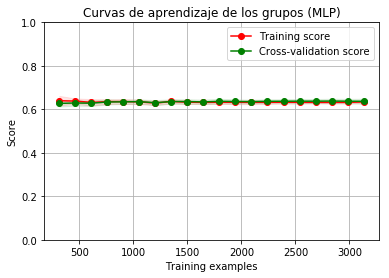

In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1e-2, hidden_layer_sizes=(4,2), random_state=1)

title = "Curvas de aprendizaje de los grupos (MLP)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = mlp
plot_learning_curve(estimator, title, x_pca, gruposDf, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [29]:
x_mano = principalDf
y_mano = gruposDf

# Datos con preprocesamiento PCA.
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(x_mano, y_mano, test_size=datos_prueba
                                                                    ,random_state=50)

from sklearn.metrics import accuracy_score
mlp.fit(X_train_PCA, y_train_PCA)
pred = mlp.predict(X_test_PCA)
#Se evalua la precisión
print('Puntaje de precisión \n \n \t Predicción de pertenecer a alguno de los tres clusters:',
      accuracy_score(y_test_PCA, pred) * 100)

# Probabilidad de predecir a cual grupo pertenece.
prediccion_grupos = accuracy_score(y_test_PCA, pred) * 100

Puntaje de precisión 
 
 	 Predicción de pertenecer a alguno de los tres clusters: 63.92344497607656


Se toman los datos crudos sin ningún preprocesamiento para luego separarlos en los grupos del análisis anterior.

In [30]:
# Se separan los datos en las etiquetas generadas por el método de DBSCAN, solo que aquí no se acuñan las
# componentes del PCA sino los datos originales

datos_crudos = pd.DataFrame(data = x)

datos_pca = pd.concat([datos_crudos, gruposDf, df[['rings']]], axis = 1)

datos_pca.columns = ['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                     'shell weight','grupo', 'rings']

#print(datos_pca)

grupo0 = datos_pca['grupo'] == 1
grupo1 = datos_pca['grupo'] == 2
grupo2 = datos_pca['grupo'] == 3

grupo0 = datos_pca[grupo0][['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                            'shell weight','rings']]
grupo1 = datos_pca[grupo1][['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                            'shell weight','rings']]
grupo2 = datos_pca[grupo2][['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                            'shell weight','rings']]

# Se reacomodan los indices pues debido a la extracción los indices no van en orden creciente unitario
grupo0 = grupo0.reset_index()
grupo0 = grupo0.drop(columns = 'index')
grupo1 = grupo1.reset_index()
grupo1 = grupo1.drop(columns = 'index')
grupo2 = grupo2.reset_index()
grupo2 = grupo2.drop(columns = 'index')

# Se guardan los datos de los anillos por grupos
anillosgrupo0 = grupo0[['rings']]
anillosgrupo1 = grupo1[['rings']]
anillosgrupo2 = grupo2[['rings']]

# Se elimina la columna con la información de los anillos para poder realizar el escalado
grupo0 = grupo0.drop(columns = 'rings')
grupo1 = grupo1.drop(columns = 'rings')
grupo2 = grupo2.drop(columns = 'rings')

grupo0 = pd.DataFrame(data = StandardScaler().fit_transform(grupo0))
grupo1 = pd.DataFrame(data = StandardScaler().fit_transform(grupo1))
grupo2 = pd.DataFrame(data = StandardScaler().fit_transform(grupo2))

# Es necesario redefinir las etiquetas
grupo0.columns = ['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                  'shell weight']
grupo1.columns = ['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                  'shell weight']
grupo2.columns = ['sex','length','diameter','height','whole height','shucked weight','viscera weight',
                  'shell weight']

## Graficar los PCA de los grupos

Se realiza el análisis de componentes principales para reducir las dimensiones de los datos, tomando las principales.

Suma acumulada de las componentes PCA de cada grupo:
Grupo 0:  [0.77490935 0.90024959 0.95920906 0.98223257 0.99128634 0.99746386
 0.99918173 1.        ]
Grupo 1:  [0.78797409 0.91296493 0.94738346 0.9701925  0.98416139 0.99585749
 0.99893765 1.        ]
Grupo 2:  [0.76403095 0.88958009 0.93597135 0.96158516 0.98077002 0.99465532
 0.99824756 1.        ]


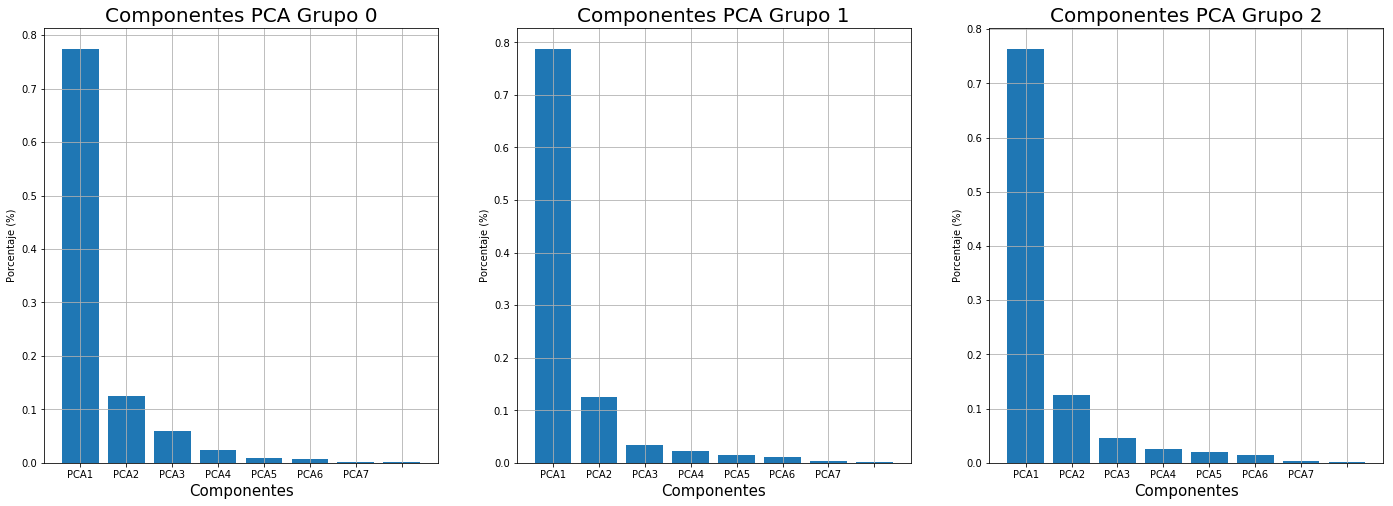

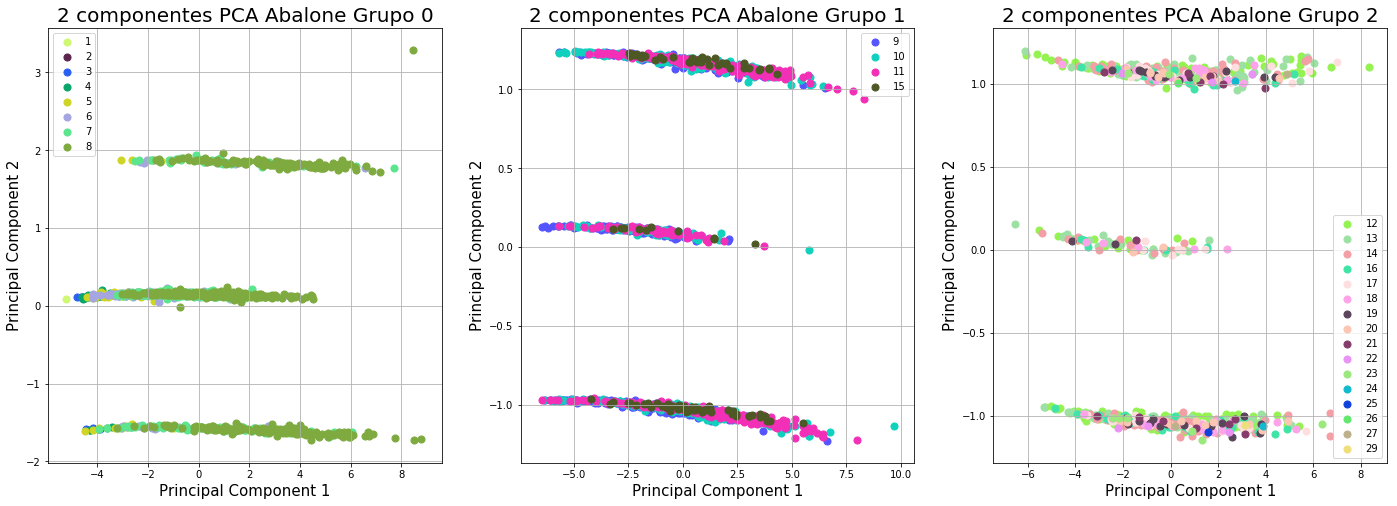

In [31]:
from sklearn.utils import column_or_1d

# Grafica los datos

fig1 = plt.figure(figsize = (8*3,8))
ax0 = fig1.add_subplot(1,3,1) 
ax1 = fig1.add_subplot(1,3,2) 
ax2 = fig1.add_subplot(1,3,3)

fig1 = plt.figure(figsize = (8*3,8))
ax0c = fig1.add_subplot(1,3,1) 
ax1c = fig1.add_subplot(1,3,2) 
ax2c = fig1.add_subplot(1,3,3)

# Grupo 0

# Se extraen todas las componentes de los datos, que son 8
n_atributes_0 = grupo0.shape[1]

# Se extrae el PCA y se introducen en los datos
pca_0 = PCA(n_components = n_atributes_0)
principalComponents_0 = pca_0.fit_transform(grupo0)

# Nombra cada una de las componentes del PCA
pca_features_0 = ['PCA' + str(i) for i in range(n_atributes_0)]
#principalDf0 = pd.DataFrame(data = principalComponents_0, columns = pca_features_0)

ax0.bar(range(n_atributes_0),pca_0.explained_variance_ratio_)
ax0.set_xlabel('Componentes', fontsize = 15)
ax0.set_xticklabels(pca_features_0)
ax0.set_ylabel('Porcentaje (%)')
ax0.set_title('Componentes PCA Grupo 0',fontsize = 20)
ax0.grid()

print('Suma acumulada de las componentes PCA de cada grupo:')

print('Grupo 0: ',pca_0.explained_variance_ratio_.cumsum())

# Se escoge graficar solo dos componentes
pca_0 = PCA(n_components=2)
principalComponents_2_0 = pca_0.fit_transform(grupo0)

principalDf0 = pd.DataFrame(data = principalComponents_2_0)

le = preprocessing.LabelEncoder()
le.fit(anillosgrupo0)
targets_0 = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf0 = pd.concat([principalDf0, anillosgrupo0], axis = 1)

ax0c.set_xlabel('Principal Component 1', fontsize = 15)
ax0c.set_ylabel('Principal Component 2', fontsize = 15)
ax0c.set_title('2 componentes PCA Abalone Grupo 0', fontsize = 20)

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets_0:
    # Busca los indices que sean iguales al target
    indices = finalDf0['rings'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax0c.scatter(finalDf0.loc[indices, 0]
               , finalDf0.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax0c.legend(targets_0)
ax0c.grid()

# Grupo 1

# Se extraen todas las componentes de los datos, que son 8
n_atributes_1 = grupo1.shape[1]

# Se extrae el PCA y se introducen en los datos
pca_1 = PCA(n_components = n_atributes_1)
principalComponents_1 = pca_1.fit_transform(grupo1)

# Nombra cada una de las componentes del PCA
pca_features_1 = ['PCA' + str(i) for i in range(n_atributes_1)]

# Grafica los datos
ax1.bar(range(n_atributes_1),pca_1.explained_variance_ratio_)
ax1.set_xlabel('Componentes', fontsize = 15)
ax1.set_xticklabels(pca_features_1)
ax1.set_ylabel('Porcentaje (%)')
ax1.set_title('Componentes PCA Grupo 1',fontsize = 20)
ax1.grid()

print('Grupo 1: ',pca_1.explained_variance_ratio_.cumsum())

# Se escoge graficar solo dos componentes
pca_1 = PCA(n_components=2)
principalComponents_2_1 = pca_1.fit_transform(grupo1)

principalDf1 = pd.DataFrame(data = principalComponents_2_1)

le = preprocessing.LabelEncoder()
le.fit(anillosgrupo1)
targets_1 = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf1 = pd.concat([principalDf1, anillosgrupo1], axis = 1)

ax1c.set_xlabel('Principal Component 1', fontsize = 15)
ax1c.set_ylabel('Principal Component 2', fontsize = 15)
ax1c.set_title('2 componentes PCA Abalone Grupo 1', fontsize = 20)

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets_1:
    # Busca los indices que sean iguales al target
    indices = finalDf1['rings'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax1c.scatter(finalDf1.loc[indices, 0]
               , finalDf1.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax1c.legend(targets_1)
ax1c.grid()

# Grupo 2

# Se extraen todas las componentes de los datos, que son 8
n_atributes_2 = grupo2.shape[1]

# Se extrae el PCA y se introducen en los datos
pca_2 = PCA(n_components = n_atributes_2)
principalComponents_2 = pca_2.fit_transform(grupo2)

# Nombra cada una de las componentes del PCA
pca_features_2 = ['PCA' + str(i) for i in range(n_atributes_2)]

# Grafica los datos
ax2.bar(range(n_atributes_2),pca_2.explained_variance_ratio_)
ax2.set_xlabel('Componentes', fontsize = 15)
ax2.set_xticklabels(pca_features_2)
ax2.set_ylabel('Porcentaje (%)')
ax2.set_title('Componentes PCA Grupo 2',fontsize = 20)
ax2.grid()

print('Grupo 2: ',pca_2.explained_variance_ratio_.cumsum())

# Se escoge graficar solo dos componentes
pca_2 = PCA(n_components=2)
principalComponents_2_2 = pca_1.fit_transform(grupo2)

principalDf2 = pd.DataFrame(data = principalComponents_2_2)

le = preprocessing.LabelEncoder()
le.fit(anillosgrupo2)
targets_2 = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf2 = pd.concat([principalDf2, anillosgrupo2], axis = 1)

ax2c.set_xlabel('Principal Component 1', fontsize = 15)
ax2c.set_ylabel('Principal Component 2', fontsize = 15)
ax2c.set_title('2 componentes PCA Abalone Grupo 2', fontsize = 20)

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets_2:
    # Busca los indices que sean iguales al target
    indices = finalDf2['rings'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax2c.scatter(finalDf2.loc[indices, 0]
               , finalDf2.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax2c.legend(targets_2)
ax2c.grid()

Se nota que se forman tres clusters en cada uno de los grupos, esto es pues la selección se hizo a mano con un criterio de selección por parte del diseñador.

## Obtención de curvas de aprendizaje

In [32]:
x_pca_0 = principalDf0
x_pca_1 = principalDf1
x_pca_2 = principalDf2

x_0 = grupo0
x_1 = grupo1
x_2 = grupo2

y_pca_0 = anillosgrupo0
y_pca_1 = anillosgrupo1
y_pca_2 = anillosgrupo2

datos_prueba = 0.25;

# Datos con preprocesamiento PCA.
X_train_PCA_0, X_test_PCA_0, y_train_PCA_0, y_test_PCA_0 = train_test_split(x_pca_0, y_pca_0,
                                                                            test_size=datos_prueba,random_state=50)
X_train_PCA_1, X_test_PCA_1, y_train_PCA_1, y_test_PCA_1 = train_test_split(x_pca_1, y_pca_1,
                                                                            test_size=datos_prueba,random_state=50)
X_train_PCA_2, X_test_PCA_2, y_train_PCA_2, y_test_PCA_2 = train_test_split(x_pca_2, y_pca_2,
                                                                            test_size=datos_prueba,random_state=50)

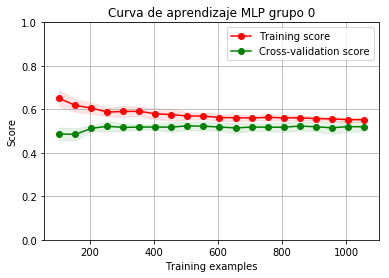

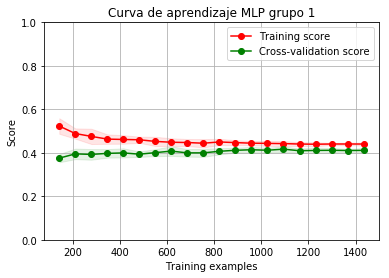

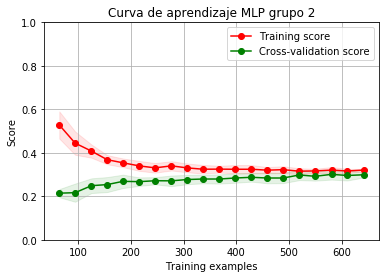

In [33]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(8,), random_state=1, learning_rate = 'adaptive')

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = mlp

title = "Curva de aprendizaje MLP grupo 0"
plot_learning_curve(estimator, title, x_pca_0, y_pca_0, ylim=(0.0, 1.0), cv=cv, n_jobs=4)
plt.show()

title = "Curva de aprendizaje MLP grupo 1"
plot_learning_curve(estimator, title, x_pca_1, y_pca_1, ylim=(0.0, 1.0), cv=cv, n_jobs=4)
plt.show()

title = "Curva de aprendizaje MLP grupo 2"
plot_learning_curve(estimator, title, x_pca_2, y_pca_2, ylim=(0.0, 1.0), cv=cv, n_jobs=4)
plt.show()

In [34]:
mlp.fit(X_train_PCA_0, y_train_PCA_0)
pred_0 = mlp.predict(X_test_PCA_0)

mlp.fit(X_train_PCA_1, y_train_PCA_1)
pred_1 = mlp.predict(X_test_PCA_1)

mlp.fit(X_train_PCA_2, y_train_PCA_2)
pred_2 = mlp.predict(X_test_PCA_2)

#Se evalua la precisión
print('Puntaje de precisión \n \n \t Grupo 0:', accuracy_score(y_test_PCA_0, pred_0) * 100,
      '\n \t Grupo 1:', accuracy_score(y_test_PCA_1, pred_1) * 100,
      '\n \t Grupo 2:', accuracy_score(y_test_PCA_2, pred_2) * 100,
      '\n \n \t Promedio ponderado de los tres grupos: ', (accuracy_score(y_test_PCA_0, pred_0) + 
                                                          accuracy_score(y_test_PCA_1, pred_1) +
                                                          accuracy_score(y_test_PCA_2, pred_2)) * 100 / 3)

Puntaje de precisión 
 
 	 Grupo 0: 53.125 
 	 Grupo 1: 40.91858037578288 
 	 Grupo 2: 30.23255813953488 
 
 	 Promedio ponderado de los tres grupos:  41.425379505105916


Se nota que hay una mejora significativa en los datos con respecto a las dos propuestas anteriores, pero es necesario tomar en cuenta la degradación a la hora de dividir en tres grupos los datos. Esto sería aplicar el teorema de Bayes para encontrar la probabilidad real de la predicción de los datos

In [35]:
# prediccion_grupos = 63.92344497607656 / 100
print('Puntaje de precisión de los datos según :', (accuracy_score(y_test_PCA_0, pred_0) + 
                                                    accuracy_score(y_test_PCA_1, pred_1) +
                                                    accuracy_score(y_test_PCA_2, pred_2)) * prediccion_grupos / 3)

Puntaje de precisión de los datos según : 26.480529674077278


Se nota una mejorar del 3% en la precisión de los anillos en los grupos, sin embargo, esta mejora es poco significativa para la predicción de los datos.

# Cuales son los requerimientos reales para una aplicación relevante al problema

Según una pesquisa realizada, este molusco puede ser pescado "legalmente" en zonas comerciales designadas cuando tienen 8~10 años.

Entonces, dado este dato se investiga si es posible determinar si un abalone es "pescable", si pasa de más de 8 anillos presentes. Esta propuesta se realiza observando la distribución de los datos, los cuales son una campana de Gauss con centro en aproximadamente 9 anillos, esto se nota de la mejora significativa al hacer más gruesa la predicción, prediciendo grupos y no anillos.

Se puede usar el análisis de la tercera propuesta, pues el grupo 0 cuenta con todos los anillos de 8 o menos. Es necesario concatenar los otros dos grupos para hacer uno solo.

In [36]:
grupo0, grupo1, grupo2,grupos = ([] for i in range(4))

for i in range(len(x_pca)):
    #grupos.append(y[i])
    if finalDf.loc[i, 'rings'] <= 8:
        grupos.append(1)
    else:
        grupos.append(2)
        
# Se crean las nuevas etiquetas clasificar en cada grupo
gruposDf = pd.DataFrame(data = grupos)

#print(gruposDf)

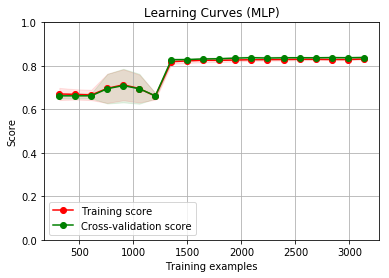

In [39]:
mlp = MLPClassifier(alpha=1e-2, hidden_layer_sizes=(4,2), random_state=1)

title = "Learning Curves (MLP)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = mlp
plot_learning_curve(estimator, title, x_pca, gruposDf, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

In [38]:
datos_prueba = 0.25

x_pca = principalDf
y_pca = gruposDf

# Datos con preprocesamiento PCA.
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(x_pca, y_pca,test_size=datos_prueba,
                                                                    random_state=50)

from sklearn.metrics import accuracy_score
mlp.fit(X_train_PCA, y_train_PCA)
pred = mlp.predict(X_test_PCA)
#Se evalua la precisión
print('Puntaje de precisión \n \n \t Predicción de tener mas o menos de 8 anillos:',
      accuracy_score(y_test_PCA, pred) * 100)

Puntaje de precisión 
 
 	 Predicción de tener mas o menos de 8 anillos: 82.58373205741627


Se nota que se puede predecir con un 82% de exactitud si un molusco es mayor o menor de 8 anillos, esta predicción parece razonable para crear un criterio.

# Pensamientos Finales

Del análisis de los datos se pueden extraer las siguientes conclusiones:

- Los datos están desequilibrados, formando una campana de Gauss, al existir pocos datos en los extremos haciendo sumamente difícil predecir de cual grupo pertenecen. Es necesario equilibrarlos con más información si se quisiera predecir los anillos con exactitud.
- El análisis acuñando por grupos es una manera de mejorar el porcentaje de predicción de los datos, sacrificando la pertenencia de los datos, haciéndolo más grueso. Esto último es una manera de mejorar la predicción de los datos.
- La creación de clusters a través de DBSCAN permite crear etiquetas eficientes de los grupos visibles, simplificando la creación de una etapa de aprendizaje supervisado.
- Es posible predecir si un abalone es suficientemente maduro para ser pescado, al poder definir con un 82% de exactitud si es mayor o menor a 8 anillos, lo cual es directamente relacionado con la edad. Este acercamiento 
- En este caso el análisis de componentes principales permite la predicción de los datos con las dos primeras componentes, reduciendo la dimensionalidad de 8 features a 2 componentes.
- Es necesario encontrar la relevancia que tiene cada atributo para la predicción del número de anillos, asignandole un peso a cada uno, pudiendosele aplicar algún aprendizaje automático como Decission Trees.